# background

transformers are a type of deep learning model architecture that has revolutionized natural language processing (NLP) and various other domains. Introduced in the 2017 paper "Attention Is All You Need" by Vaswani et al., transformers have become the foundation for many state-of-the-art models in NLP and beyond.

imp components of tranformer : 

1. self-attention : allows the model to weigh the importance of different parts of the input when processing each element.

2. parallelization: unlike recurrent neural networks (RNNs), transformers can process all input elements simultaneously, leading to faster training and inference.

3. positional encoding: it helps the model to understand the order of input elements without using recurrence.(there has been little update here like ROPE(rotary positional encoding))

4. encoder-decoder architecture: suitable for various tasks, including machine translation, text summarization, and more.

5. scalability: transformers can be scaled to very large models with billions of parameters, leading to impressive performance on many tasks.

early SOTA model based on transfomer : 
- BERT (Bidirectional Encoder Representations from Transformers)
- GPT (Generative Pre-trained Transformer) series
- T5 (Text-to-Text Transfer Transformer)

these models have achieved state-of-the-art results in various NLP tasks and have been adapted for use in other domains like computer vision and speech processing.(with some samll chnages in arch)



# transformer architecture: detailed explanation


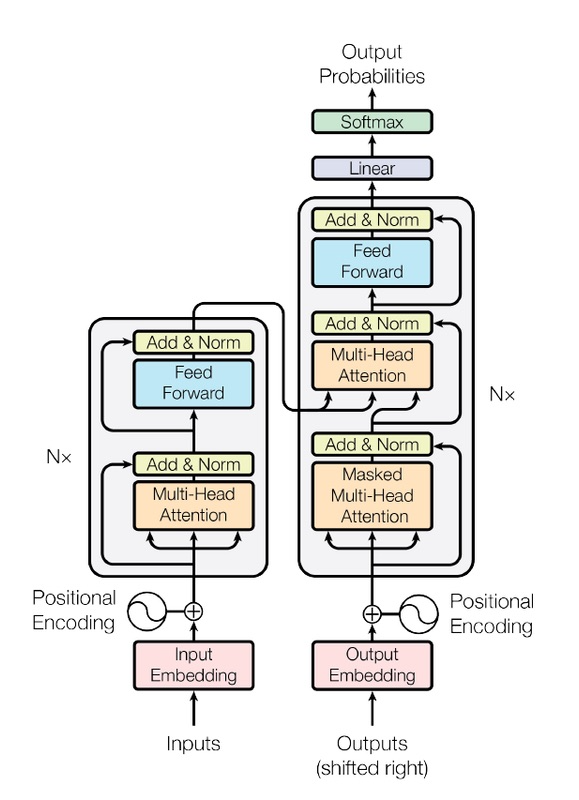

## 1. input embedding

the first step in a transformer is to convert input tokens into continuous vector representations.

**formula:**
$E = WX$

Where:
- $E$ is the embedding matrix
- $W$ is the weight matrix
- $X$ is the one-hot encoded input

**explanation:** 

> what is embedding ?

as we know that llms can not work with raw text data. and we cannot use the traditional ways to convert the text data into numbers. so emedding cames into play it convert the data into vector format.

for that we use the text embedding model. embedding model maps the words to point in a continous vector spaces.

for example, word2vec by google is one of the old model that was trained to generate the embedding of the text data.
when visualise into 2-dim it seen that similar terms cluster together. 
the below vector representation is in 2d.

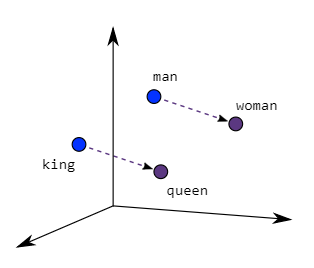

but when we work with llms we use much high dim. it varries acc to size of model.(it reffered as the dim of model's hidden state).

the word embeddign model we use for llms is more advanced version of the word2vec model.

ex. llama3-7b has embedding dimension of 4,096 and llama3-70b has embedding dimension of 12,288. 

## 2. positional encoding


transformers don't inherently consider the order of input, positional information is added to the embeddings.

**Formula:**
$PE_{(pos,2i)} = sin(pos / 10000^{2i/d_{model}})$
$PE_{(pos,2i+1)} = cos(pos / 10000^{2i/d_{model}})$

Where:
- $pos$ is the position
- $i$ is the dimension
- $d_{model}$ is the embedding dimension

**explanation:** this creates a unique encoding for each position, allowing the model to distinguish between different positions in the sequence.(new update positional embedding is ROPE)

> but why is imp 

in languages, the order of the words and their position in a sentence really matters. the meaning of the entire sentence can change if the words are re-ordered.(the semantic means comes from the order of words)

> what is positional embedding ? (and why using this trigonometric formula)

positional encoding describes the location or position of an entity in a sequence so that each position is assigned a unique representation. there are many reasons why a single number, such as the index value, is not used to represent an item’s position in transformer models. For long sequences, the indices can grow large in magnitude. if you normalize the index value to lie between 0 and 1, it can create problems for variable length sequences as they would be normalized differently.

so positional encoding shopuld be bounded, discrete and should caputure the relative positining(measn function should be periodic)

in transformer each positiona/index is mapped to a vector.

for example 

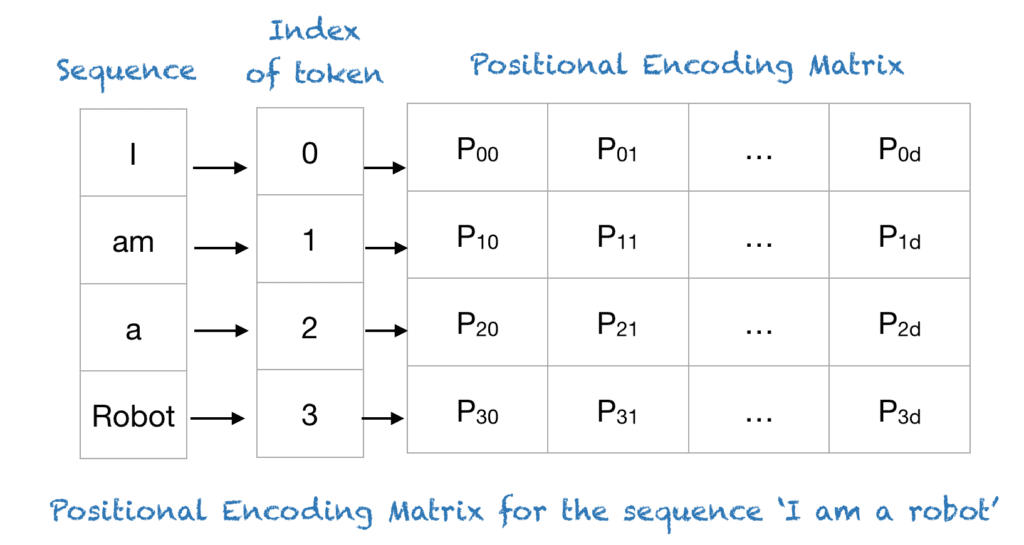

> in order to create the relative positioning we use trignometric functions 

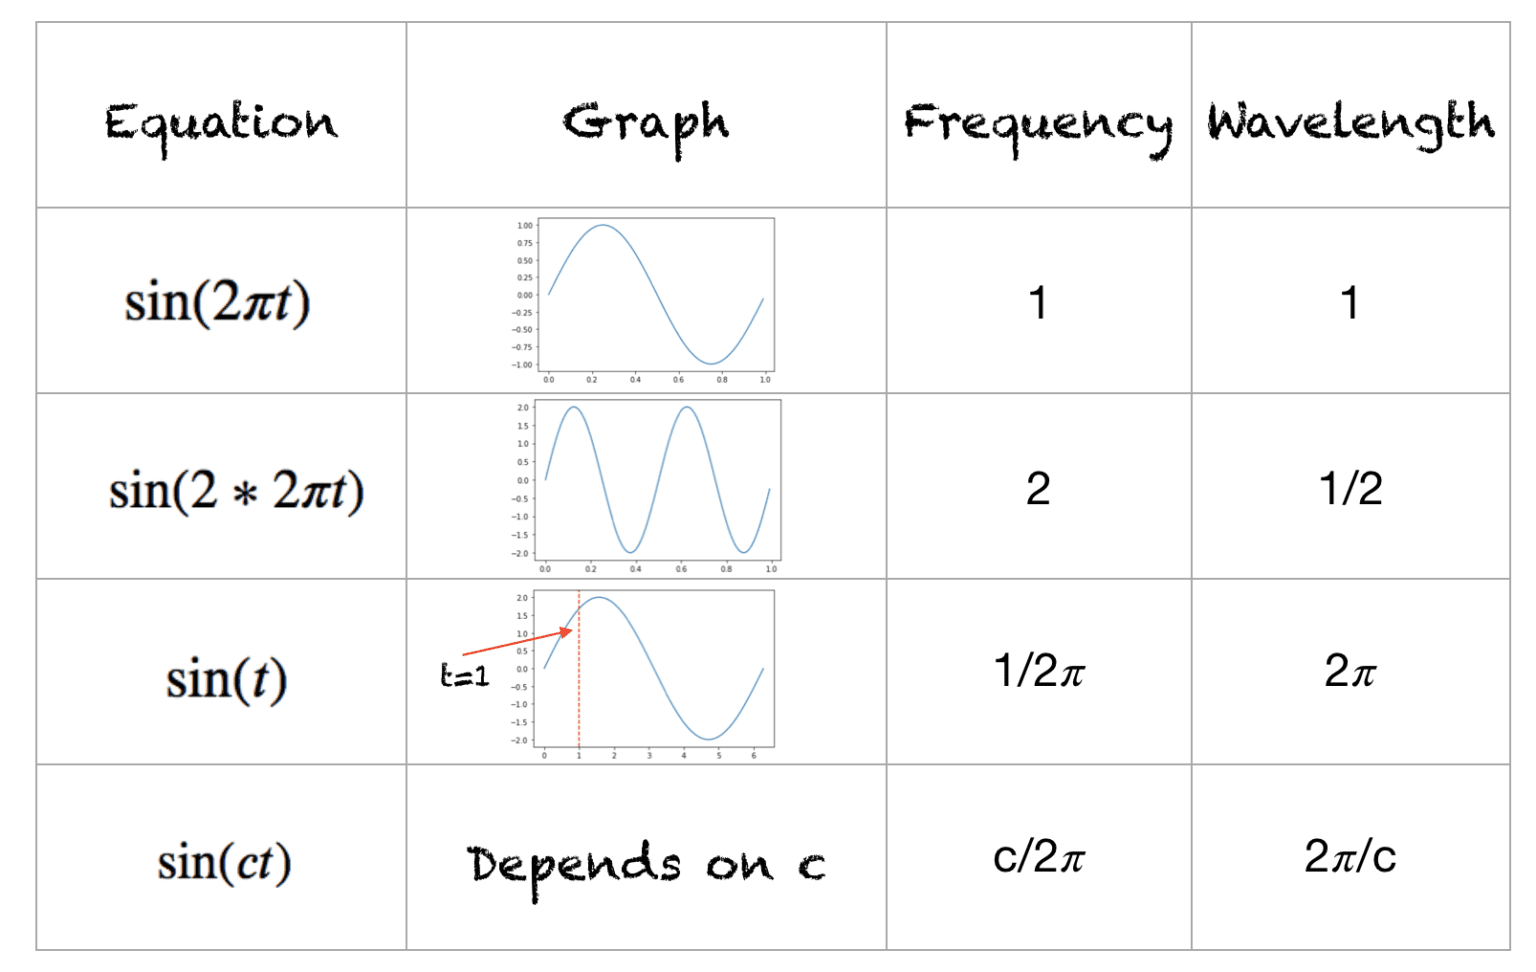


> lets take a example 

**phrase “I am a robot,” with n=100 and d=4**

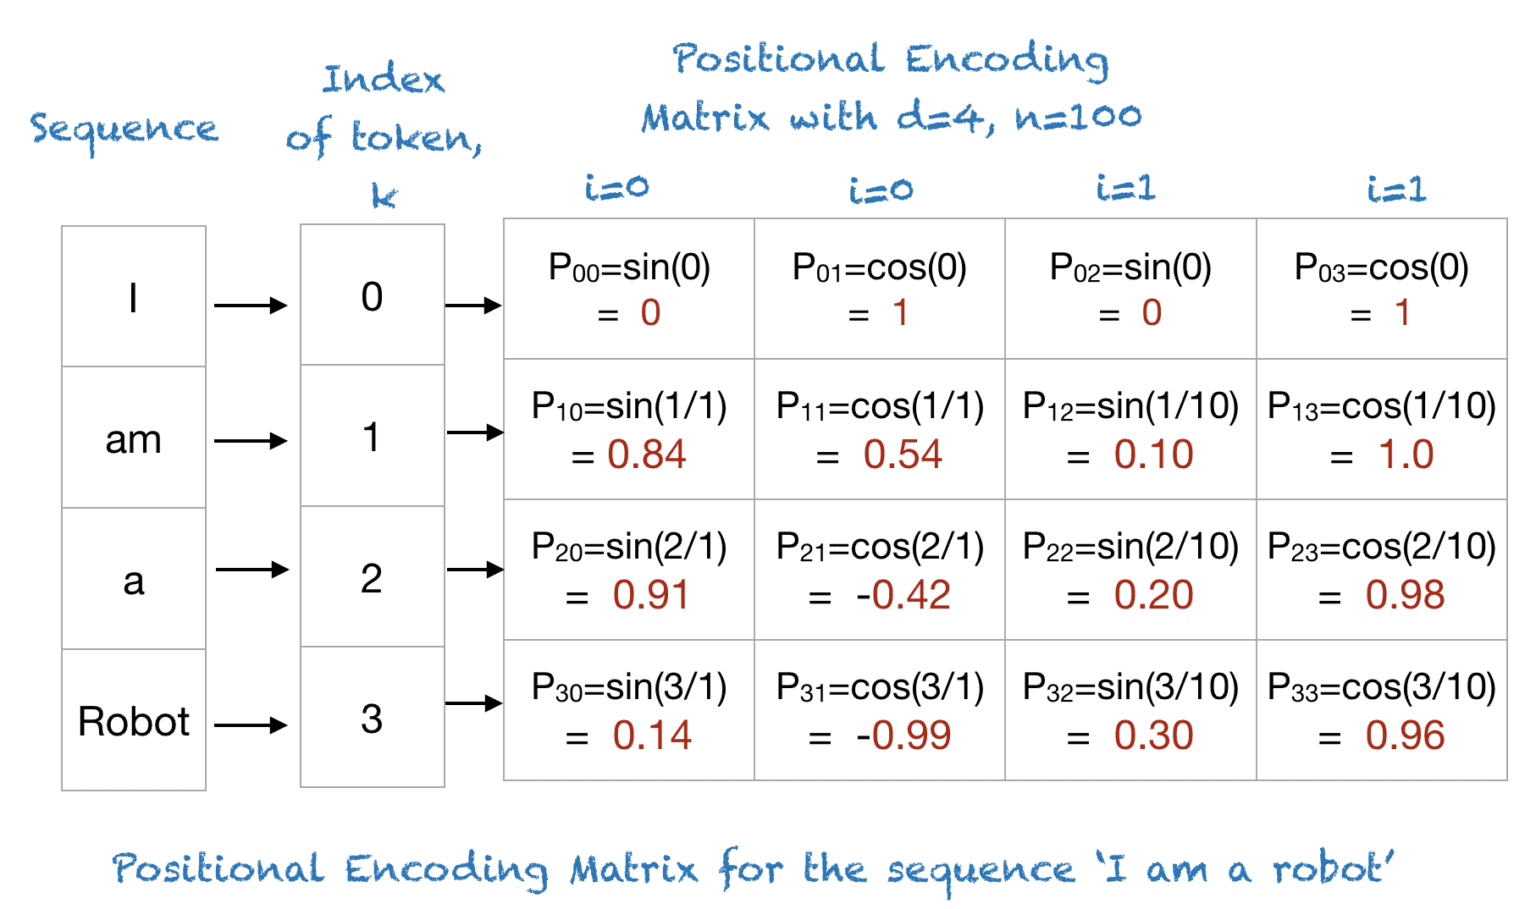


## 3. multi-head attention

the core of the transformer, allowing it to focus on different parts of the input when processing each element.

### 3.1 scaled dot-product attention

**Formula:**
$Attention(Q, K, V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$

Where:
- $Q$ is the query matrix
- $K$ is the key matrix
- $V$ is the value matrix
- $d_k$ is the dimension of the keys

**Explanation:** this computes compatibility between queries and keys, scales to prevent small gradients, applies softmax to get attention weights, and then computes a weighted sum of values.

### 3.2 multi-head attention

**Formula:**
$MultiHead(Q, K, V) = Concat(head_1, ..., head_h)W^O$
$where~head_i = Attention(QW_i^Q, KW_i^K, VW_i^V)$

**Explanation:** this applies the attention mechanism multiple times in parallel, allowing the model to capture different types of relationships between elements.

## 4. feed-forward 

each attention layer is followed by a position-wise feed-forward network.

**Formula:**
$FFN(x) = max(0, xW_1 + b_1)W_2 + b_2$

**Explanation:** this introduces non-linearity and increases the model's capacity to learn complex functions.

## 5. layer normalization

applied after each sub-layer in the encoder and decoder.

**Formula:**
$LayerNorm(x) = \gamma * \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} + \beta$

Where:
- $\mu$ is the mean of the inputs
- $\sigma$ is the standard deviation
- $\gamma$ and $\beta$ are learned parameters
- $\epsilon$ is a small constant for numerical stability

**explanation:** this normalizes the inputs to each layer, which helps stabilize the learning process.


In [ ]:
#